# Лабораторная работа №2
## Выполнила студентка группы ДПИ22-2, Сирина Яна

# **Цель:**

Научиться применять основные методы кластеризации данных с использованием библиотеки Python.

# **Введение в кластеризацию данных:**

Кластеризация данных — это процесс разделения схожих объектов на группы (кластеры). Она широко используется в анализе данных для выявления структуры в данных, идентификации скрытых паттернов и многих других задач.

# **Основные методы кластеризации:**

1. K-means
2. DBSCAN
3. Hierarchical clustering

# **Загрузка данных:**

В качестве примера, давайте загрузим набор данных ирисов:

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

# **Применение метода кластеризации:**

K-means:

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

DBSCAN:

In [3]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

DBSCAN()

Hierarchical clustering:

In [4]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical.fit(X)

AgglomerativeClustering(n_clusters=3)

Визуализация результатов:

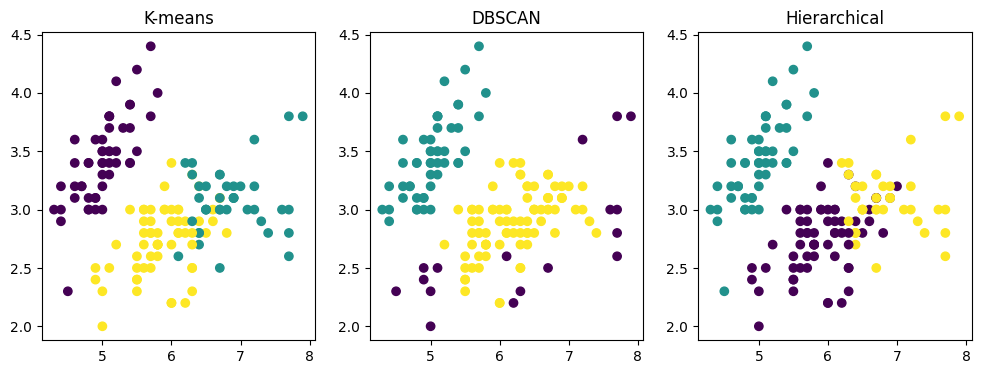

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means')

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN')

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=hierarchical.labels_, cmap='viridis')
plt.title('Hierarchical')

plt.show()


Задания для самостоятельного выполнения

1. K-means кластеризация:

Загрузите набор данных "Ирисы" (можно использовать функцию load_iris() из библиотеки sklearn.datasets). Примените алгоритм K-means для кластеризации данных. Визуализируйте полученные кластеры на плоскости, используя только два признака (например, длину и ширину лепестка). Попробуйте различное количество кластеров (2, 3, 4) и сравните результаты.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

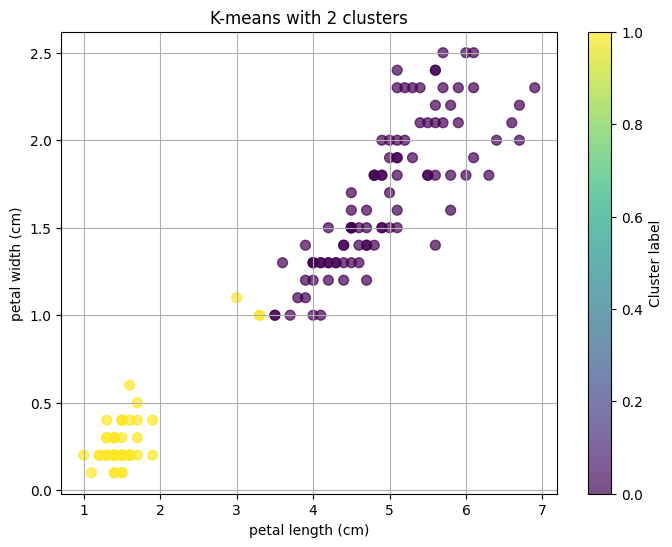

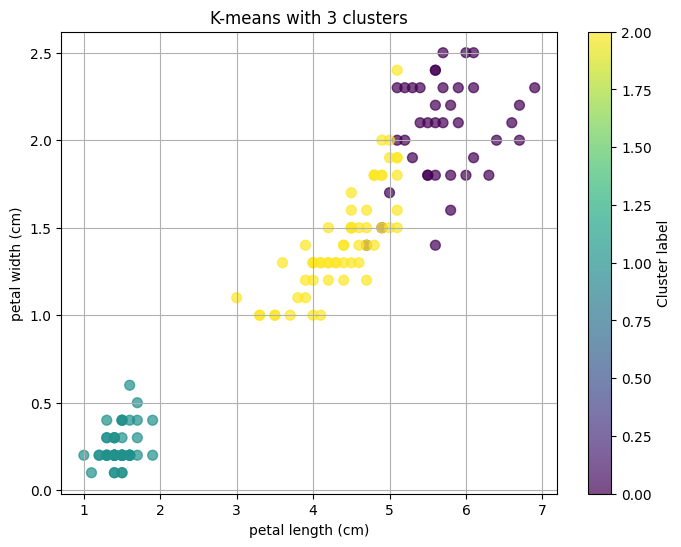

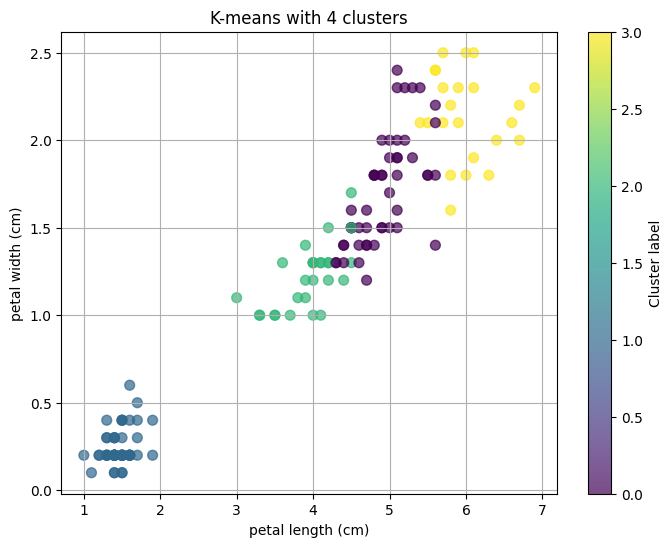

In [7]:
# Загрузка данных "Ирисы"
iris = load_iris()
X = iris.data


def plot_clusters(data, labels, title, features=(0, 1)):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, features[0]], data[:, features[1]], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.title(title)
    plt.xlabel(iris.feature_names[features[0]])
    plt.ylabel(iris.feature_names[features[1]])
    plt.colorbar(label='Cluster label')
    plt.grid()
    plt.show()

for n_clusters in [2, 3, 4]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    plot_clusters(X, kmeans_labels, f"K-means with {n_clusters} clusters", features=(2, 3))

2. Загрузите набор данных "Круги" (можно создать с помощью функции make_circles() из библиотеки sklearn.datasets). Примените алгоритм DBSCAN для кластеризации данных. Визуализируйте полученные кластеры на плоскости. Попробуйте различные значения параметров eps и min_samples и определите, как они влияют на результат кластеризации.

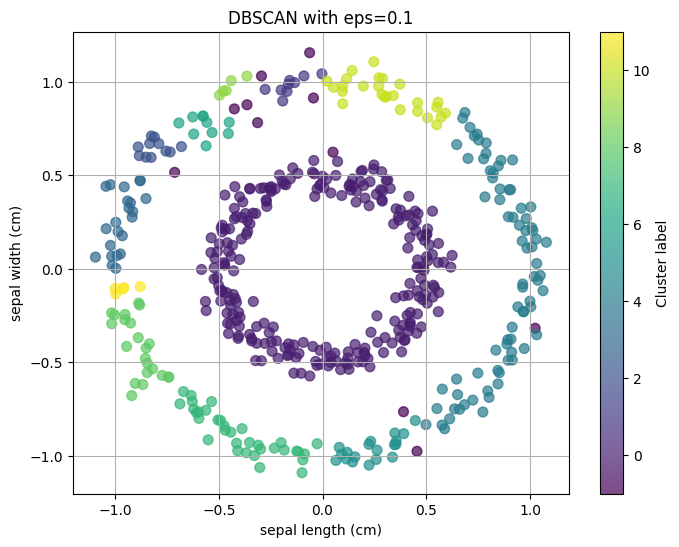

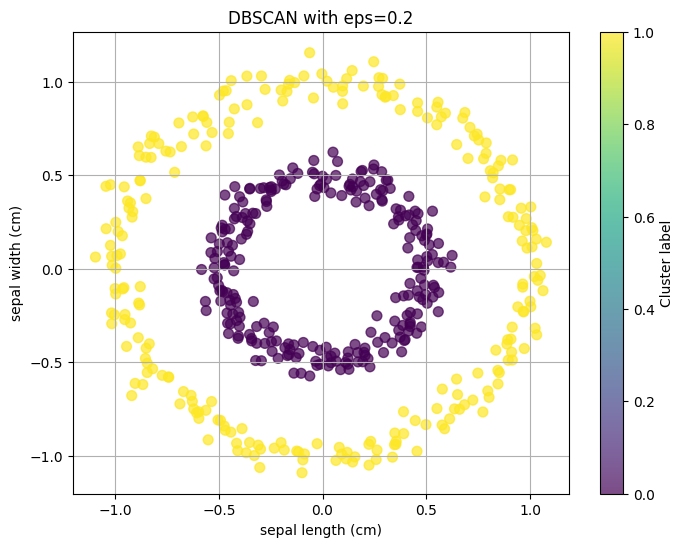

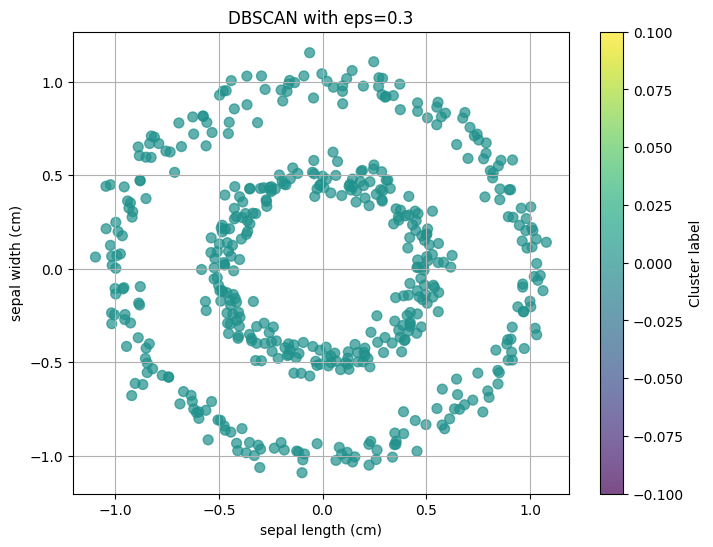

In [8]:
# DBSCAN кластеризация

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles

# Создание набора данных "Круги"
X_circles, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# Применение алгоритма DBSCAN с разными параметрами
for eps in [0.1, 0.2, 0.3]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_circles)
    plot_clusters(X_circles, dbscan_labels, f"DBSCAN with eps={eps}")

Иерархическая кластеризация:

Загрузите набор данных "Случайные точки" (можно создать с помощью функции make_blobs() из библиотеки sklearn.datasets). Примените иерархическую кластеризацию с помощью алгоритма AgglomerativeClustering. Визуализируйте дендрограмму полученных кластеров. Попробуйте различное количество кластеров и определите оптимальное число кластеров для данного набора данных.

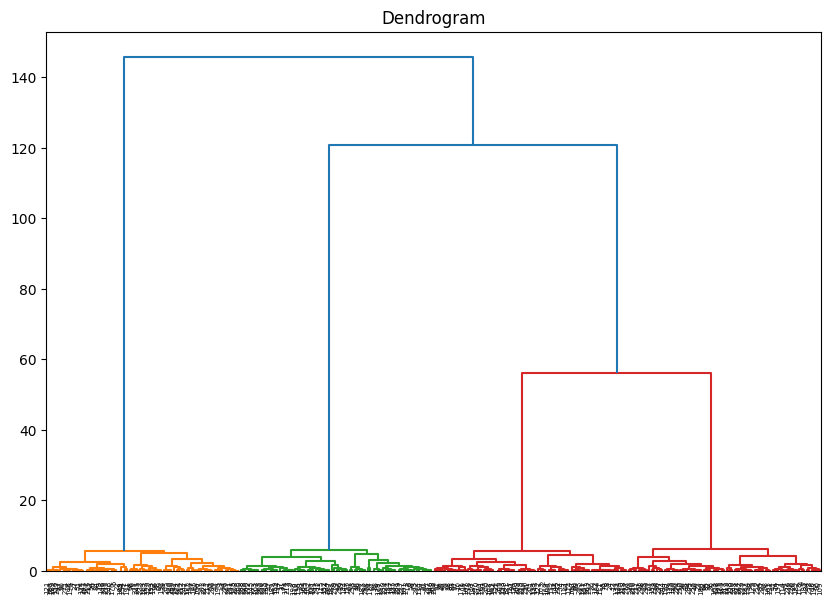

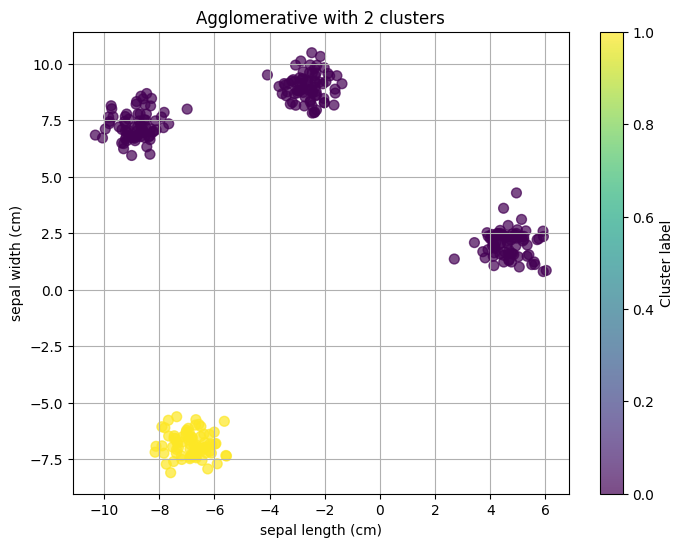

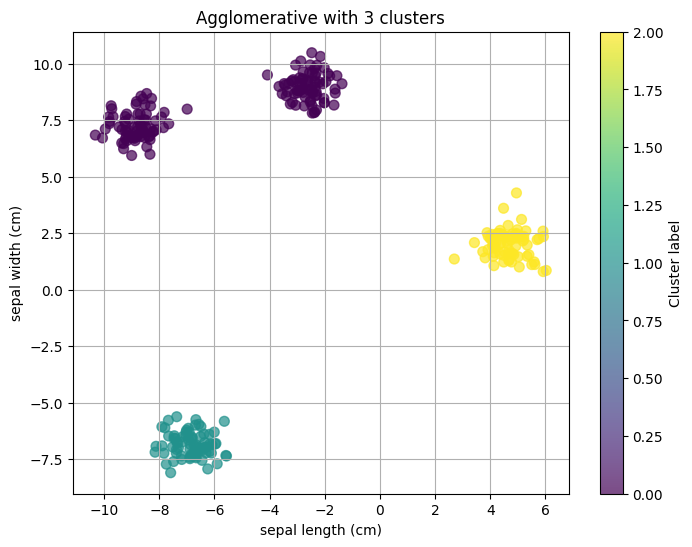

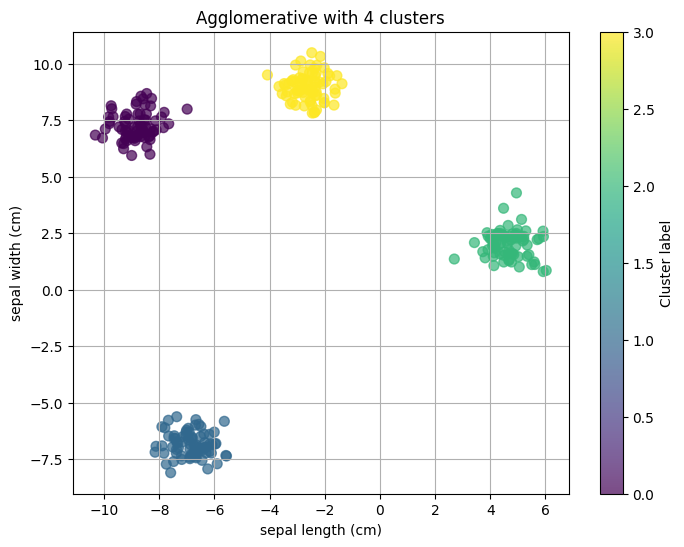

In [9]:
# Иерархическая кластеризация

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage

# Создание набора данных "Случайные точки"
X_blobs, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Построение дендрограммы
linked = linkage(X_blobs, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogram")
plt.show()

# Применение AgglomerativeClustering
for n_clusters in [2, 3, 4]:
    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    agglo_labels = agglo.fit_predict(X_blobs)
    plot_clusters(X_blobs, agglo_labels, f"Agglomerative with {n_clusters} clusters")

Сравнение алгоритмов:

Загрузите набор данных "Ирисы". Примените все три алгоритма кластеризации (K-means, DBSCAN, иерархическая) к этим данным. Сравните результаты кластеризации по метрикам, таким как индекс силуэта (можно использовать функцию silhouette_score() из sklearn.metrics). Определите, какой алгоритм лучше всего подходит для данного набора данных.

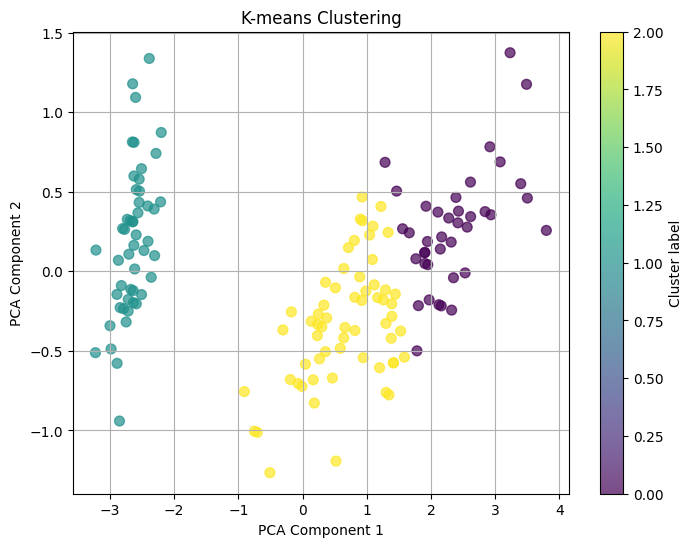

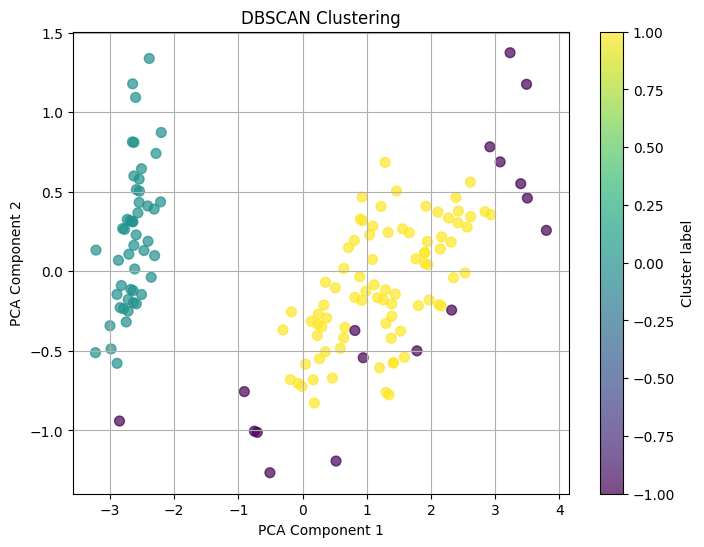

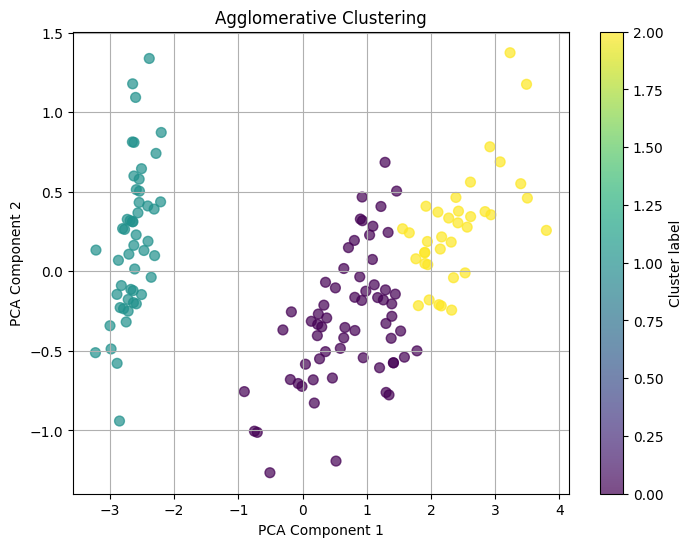

Сравнение алгоритмов кластеризации:
       Algorithm  Silhouette Score
0        K-means          0.551192
1         DBSCAN          0.486034
2  Agglomerative          0.554324


In [10]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pandas as pd

algorithms = {
    "K-means": KMeans(n_clusters=3, random_state=42),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "Agglomerative": AgglomerativeClustering(n_clusters=3)
}

def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(label='Cluster label')
    plt.grid()
    plt.show()

# Применение алгоритмов и вычисление индекса силуэта
results = []
for name, algorithm in algorithms.items():
    labels = algorithm.fit_predict(X)
    score = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
    results.append({"Algorithm": name, "Silhouette Score": score})
    plot_clusters(X, labels, f"{name} Clustering")

results_df = pd.DataFrame(results)
print("Сравнение алгоритмов кластеризации:")
print(results_df)
